### Spam Email Detector - Model Training

In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Enable inline plots
%matplotlib inline

### Step 2: Load and Explore Dataset

In [2]:
# Load dataset (Ensure it has 'text' and 'label' columns)
df = pd.read_csv("/workspaces/spam_email_detector/dataset/spam_email_dataset.csv")

# Display the first 5 rows
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
# Check for missing values
df.isnull().sum()

label    0
text     0
dtype: int64

/tmp/ipykernel_6363/4116954163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["label"], palette="coolwarm")


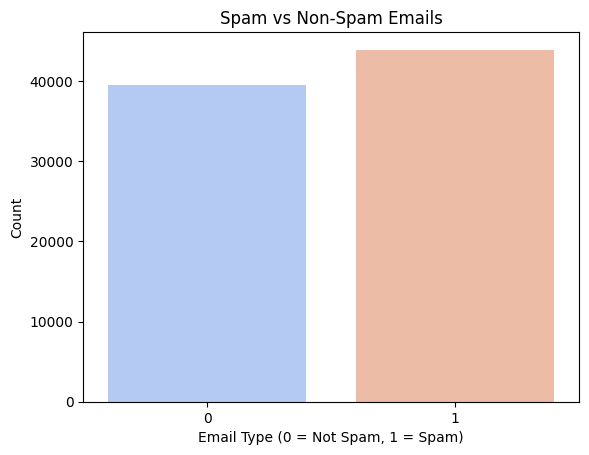

In [5]:
# Count spam vs not spam
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Spam vs Non-Spam Emails")
plt.xlabel("Email Type (0 = Not Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()

### Step 3: Data Processing

In [6]:
# Convert labels to binary (assuming 1 = Spam, 0 = Not Spam)
X = df["text"]
y = df["label"]

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size {len(X_test)}")

Training set size: 66758
Test set size 16690


### Step 4: Text Vectorization (TF-IDF)

In [7]:
# Convert text into numerical features
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Print feature size
print(f"Feature shape: {X_train_tfidf.shape}")

Feature shape: (66758, 276601)


### Step 5: Train the Naive Bayes Model

In [8]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred = model.predict(X_test_tfidf)

### Step 6: Model Evaluation

Model Accuracy: 0.98
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7938
           1       0.99      0.96      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



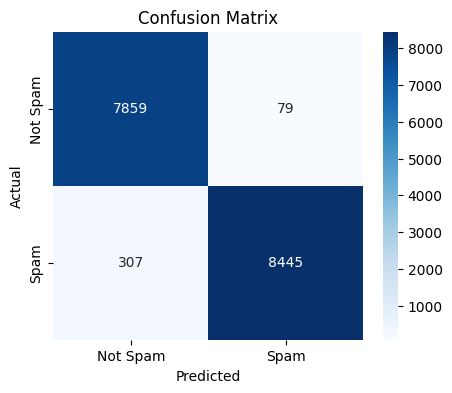

In [9]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Step 7: Save the Model & Vectorizer

In [10]:
# Save the trained model and vectorizer
pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
